### 4. Explore & Understand Fashion-MNIST

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
DATA_DIR = '/Users/limengfeiyang/CMOR438-final-project/data/fashion_mnist'

train_path = os.path.join(DATA_DIR, 'train.csv')
test_path  = os.path.join(DATA_DIR, 'test.csv')

# Read CSVs into DataFrames
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

# Check
print("Train shape:", df_train.shape)
print("Test shape: ", df_test.shape)


Train shape: (60000, 785)
Test shape:  (10000, 785)


In [16]:
# First 5 rows
df_train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Data types & non-null counts
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [18]:
# Basic statistics on pixel columns
df_train.describe().T 


,count,mean,std,min,25%,50%,75%,max
label,60000.0,4.500000,2.872305,0.0,2.0,4.5,7.0,9.0
pixel1,60000.0,0.000900,0.094689,0.0,0.0,0.0,0.0,16.0
pixel2,60000.0,0.006150,0.271011,0.0,0.0,0.0,0.0,36.0
pixel3,60000.0,0.035333,1.222324,0.0,0.0,0.0,0.0,226.0
pixel4,60000.0,0.101933,2.452871,0.0,0.0,0.0,0.0,164.0
...,...,...,...,...,...,...,...,...
pixel780,60000.0,17.911483,45.149388,0.0,0.0,0.0,0.0,255.0
pixel781,60000.0,8.520633,29.614859,0.0,0.0,0.0,0.0,255.0
pixel782,60000.0,2.753300,17.397652,0.0,0.0,0.0,0.0,255.0
pixel783,60000.0,0.855517,9.356960,0.0,0.0,0.0,0.0,255.0


In [19]:
# Count total missing per column
missing = df_train.isna().sum()
print("Columns with missing data:\n", missing[missing > 0])


Columns with missing data:
 Series([], dtype: int64)


In [20]:
# How many examples per class
label_counts = df_train['label'].value_counts().sort_index()
label_counts.index.name = 'Class'
label_counts.name = 'Count'
print(label_counts)


Class
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: Count, dtype: int64


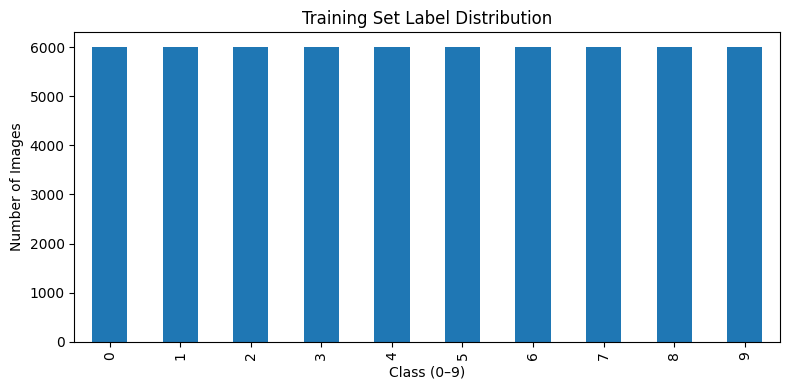

In [21]:
# Bar plot of counts
label_counts.plot(kind='bar', figsize=(8,4), title='Training Set Label Distribution')
plt.xlabel('Class (0–9)')
plt.ylabel('Number of Images')
plt.tight_layout()


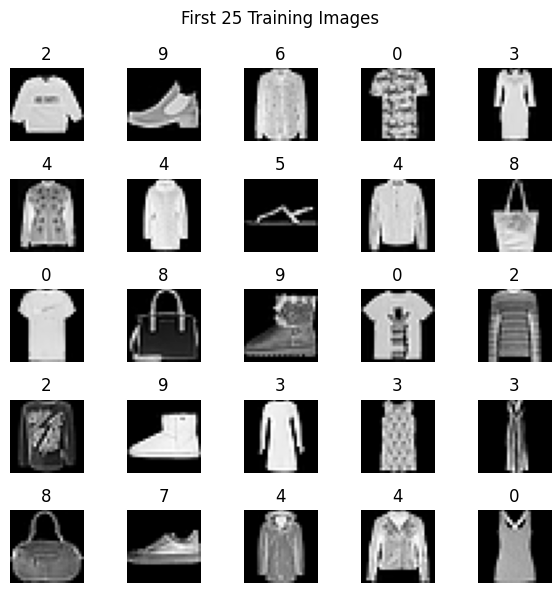

In [23]:
# 1) Take the first 25 images
sample = df_train.iloc[:25]

fig, axes = plt.subplots(5, 5, figsize=(6,6))
for i, ax in enumerate(axes.flatten()):
    
    # Extract pixel values, reshape to 28×28
    img = sample.iloc[i, 1:].values.reshape(28, 28)
    lbl = sample.iloc[i, 0]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{lbl}")
    ax.axis('off')

plt.suptitle("First 25 Training Images")
plt.tight_layout()


Min: 0 Max: 255 Mean: 72.96 Std: 89.97


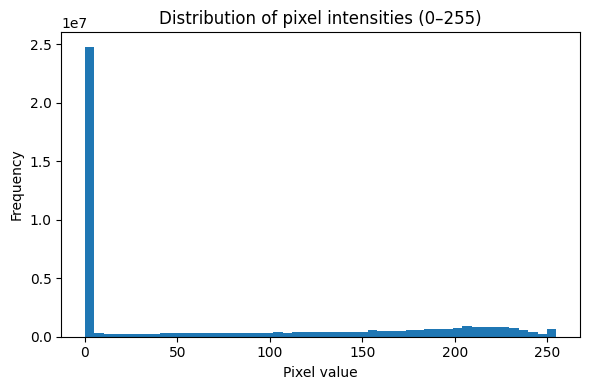

In [24]:
# Flatten all pixels into one array
all_pixels = df_train.iloc[:, 1:].values.flatten()

# Basic stats
print("Min:", all_pixels.min(), 
      "Max:", all_pixels.max(), 
      "Mean:", all_pixels.mean().round(2), 
      "Std:", all_pixels.std().round(2))

# Histogram
plt.figure(figsize=(6,4))
plt.hist(all_pixels, bins=50)
plt.title("Distribution of pixel intensities (0–255)")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.tight_layout()


### Summary

- **No missing values** in either CSV.  
- **Balanced** classes (~6,000 images each in train).  
- Pixel intensities range 0–255, mean around 73.  
